We are trying to identify what can be done about missing data. 
Now we will look at rows with too many missing fields.
We start with counting the missing fields per row.

In [3]:
import pandas as pd

# Load the cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing (NaN) values per row
df['missing_count'] = df.isna().sum(axis=1)

# Display first few rows with missing count
print(df[['id', 'missing_count']].head(10))

# Optionally show summary statistics
print("\nSummary of missing values per row:")
print(df['missing_count'].describe())

# If you want to see how many rows have more than, e.g., 10 missing fields:
num_sparse_rows = (df['missing_count'] > 10).sum()
print(f"\nRows with more than 10 missing fields: {num_sparse_rows}")


         id  missing_count
0  34221000              2
1   2104000              3
2  34036000              4
3  58496000              4
4  48727000              4
5  22183000              7
6  13232000              6
7  48707000              4
8  74290000              5
9  58028000              3

Summary of missing values per row:
count    75504.000000
mean         3.325387
std          2.114067
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         12.000000
Name: missing_count, dtype: float64

Rows with more than 10 missing fields: 2


Find the rows with the highest number of missing fields.
List exactly which columns are missing in those rows.

In [8]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing (NaN) values per row
df['missing_count'] = df.isna().sum(axis=1)

# Show basic stats
print("Summary of missing values per row:")
print(df['missing_count'].describe())

# Find the maximum number of missing fields
max_missing = df['missing_count'].max()
print(f"\nHighest number of missing fields in a row: {max_missing}")

# Get all rows that have this maximum number
most_missing_rows = df[df['missing_count'] == max_missing]

print(f"\nNumber of rows with {max_missing} missing fields: {len(most_missing_rows)}")

# Show which columns are missing for these rows
for idx, row in most_missing_rows.iterrows():
    missing_cols = row[row.isna()].index.tolist()
    print(f"\nRow index {idx}, ID: {row.get('id', 'N/A')}")
    print("Missing columns:", missing_cols)

# Optionally, display first few for inspection
display(most_missing_rows.head())

df[df["id"] == 16170000]


Summary of missing values per row:
count    75504.000000
mean         3.325387
std          2.114067
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         12.000000
Name: missing_count, dtype: float64

Highest number of missing fields in a row: 12

Number of rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income']

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income']


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
11790,16170000,5990000,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1420,50.674914,4.393347,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,6
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


In [9]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get highest and second-highest missing counts
sorted_counts = df['missing_count'].sort_values(ascending=False).unique()
max_missing = sorted_counts[0]
second_max_missing = sorted_counts[1] if len(sorted_counts) > 1 else None

print(f"Highest missing count: {max_missing}")
print(f"Second highest missing count: {second_max_missing}\n")

# Function to display rows and missing columns
def display_missing_rows(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    for idx, row in rows.iterrows():
        missing_cols = row[row.isna()].index.tolist()
        print(f"Row index {idx}, ID: {row.get('id', 'N/A')}")
        print("Missing columns:", missing_cols, "\n")
    display(rows)

# Display highest missing rows
display_missing_rows(df, max_missing)

# Display second-highest missing rows if they exist
if second_max_missing is not None:
    display_missing_rows(df, second_max_missing)



Highest missing count: 12
Second highest missing count: 10

Rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Row index 10383, ID: 26276000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'equipped_kitchen', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


In [10]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:3]  # top 3

print("Top missing counts:", top_counts, "\n")

# Function to display rows and missing columns
def display_missing_rows(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    for idx, row in rows.iterrows():
        missing_cols = row[row.isna()].index.tolist()
        print(f"Row index {idx}, ID: {row.get('id', 'N/A')}")
        print("Missing columns:", missing_cols, "\n")
    display(rows)

# Loop over top counts and display
for count in top_counts:
    display_missing_rows(df, count)



Top missing counts: [12 10  9] 

Rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Row index 10383, ID: 26276000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'equipped_kitchen', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


Rows with 9 missing fields: 277

Row index 70, ID: 30123000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 108, ID: 24067000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 132, ID: 4073000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 136, ID: 40186000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 746, ID: 75303000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9


In [11]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending, top 4
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:4]
print("Top 4 missing counts:", top_counts, "\n")

# Function to display rows and commonly missing columns
def display_missing_info(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    
    # Compute commonly missing columns across these rows
    missing_cols = rows.isna().sum().sort_values(ascending=False)
    commonly_missing = missing_cols[missing_cols > 0]
    
    print("Most commonly missing columns in these rows:")
    display(commonly_missing)
    
    # Display the actual rows for inspection
    display(rows)

# Loop over top_counts and display info
for count in top_counts:
    display_missing_info(df, count)


Top 4 missing counts: [12 10  9  8] 

Rows with 12 missing fields: 2

Most commonly missing columns in these rows:


locality                          2
province                          2
region                            2
longitude                         2
surface_land_sqm                  2
latitude                          2
equipped_kitchen                  2
cadastral_income                  2
primary_energy_consumption_sqm    2
state_building                    2
heating_type                      2
epc                               2
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Most commonly missing columns in these rows:


locality                          1
province                          1
region                            1
longitude                         1
latitude                          1
cadastral_income                  1
equipped_kitchen                  1
epc                               1
primary_energy_consumption_sqm    1
heating_type                      1
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


Rows with 9 missing fields: 277

Most commonly missing columns in these rows:


surface_land_sqm                  277
longitude                         277
latitude                          277
cadastral_income                  277
primary_energy_consumption_sqm    277
epc                               277
equipped_kitchen                  277
state_building                    277
heating_type                      277
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9


Rows with 8 missing fields: 1335

Most commonly missing columns in these rows:


latitude                          1335
longitude                         1335
cadastral_income                  1332
primary_energy_consumption_sqm    1300
epc                               1278
heating_type                      1242
equipped_kitchen                  1035
surface_land_sqm                  1028
state_building                     795
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
23,37990000,2720000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1500,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
30,43150000,3208440,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8000,NaN,NaN,...,0,0,0,NaN,0.0,NaN,NaN,0,NaN,8
230,73982000,2835000,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4620,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,1,NaN,8
258,43067000,4830000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1200,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
438,42815000,1985000,APARTMENT,APARTMENT,Wallonia,Hainaut,Soignies,7060,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,1,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75277,31235000,2790000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9120,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,1,NaN,8
75283,43758000,6950000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1180,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,8
75341,74555000,2880000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1830,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
75434,50372000,2750000,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0,0,1,GOOD,NaN,NaN,NaN,1,NaN,8


In [12]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending, top 5
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:5]
print("Top 5 missing counts:", top_counts, "\n")

# Function to display rows and commonly missing columns
def display_missing_info(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    
    # Compute commonly missing columns across these rows
    missing_cols = rows.isna().sum().sort_values(ascending=False)
    commonly_missing = missing_cols[missing_cols > 0]
    
    print("Most commonly missing columns in these rows:")
    display(commonly_missing)
    
    # Display the actual rows for inspection
    display(rows)

# Loop over top_counts and display info
for count in top_counts:
    display_missing_info(df, count)


Top 5 missing counts: [12 10  9  8  7] 

Rows with 12 missing fields: 2

Most commonly missing columns in these rows:


locality                          2
province                          2
region                            2
longitude                         2
surface_land_sqm                  2
latitude                          2
equipped_kitchen                  2
cadastral_income                  2
primary_energy_consumption_sqm    2
state_building                    2
heating_type                      2
epc                               2
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Most commonly missing columns in these rows:


locality                          1
province                          1
region                            1
longitude                         1
latitude                          1
cadastral_income                  1
equipped_kitchen                  1
epc                               1
primary_energy_consumption_sqm    1
heating_type                      1
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


Rows with 9 missing fields: 277

Most commonly missing columns in these rows:


surface_land_sqm                  277
longitude                         277
latitude                          277
cadastral_income                  277
primary_energy_consumption_sqm    277
epc                               277
equipped_kitchen                  277
state_building                    277
heating_type                      277
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9


Rows with 8 missing fields: 1335

Most commonly missing columns in these rows:


latitude                          1335
longitude                         1335
cadastral_income                  1332
primary_energy_consumption_sqm    1300
epc                               1278
heating_type                      1242
equipped_kitchen                  1035
surface_land_sqm                  1028
state_building                     795
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
23,37990000,2720000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1500,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
30,43150000,3208440,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8000,NaN,NaN,...,0,0,0,NaN,0.0,NaN,NaN,0,NaN,8
230,73982000,2835000,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4620,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,1,NaN,8
258,43067000,4830000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1200,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
438,42815000,1985000,APARTMENT,APARTMENT,Wallonia,Hainaut,Soignies,7060,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,1,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75277,31235000,2790000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9120,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,1,NaN,8
75283,43758000,6950000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1180,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,8
75341,74555000,2880000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1830,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
75434,50372000,2750000,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0,0,1,GOOD,NaN,NaN,NaN,1,NaN,8


Rows with 7 missing fields: 3597

Most commonly missing columns in these rows:


cadastral_income                  3557
heating_type                      3331
primary_energy_consumption_sqm    3297
epc                               3265
surface_land_sqm                  3112
equipped_kitchen                  3081
state_building                    2960
latitude                          1288
longitude                         1288
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
5,22183000,5485140,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,7
28,41033000,3100000,APARTMENT,PENTHOUSE,Flanders,East Flanders,Aalst,9450,50.910128,3.986940,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,7
38,12568000,2706500,APARTMENT,APARTMENT,Flanders,East Flanders,Aalst,9300,50.934240,4.048115,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,7
45,6574000,7950000,APARTMENT,APARTMENT,Flanders,West Flanders,Kortrijk,8500,NaN,NaN,...,0,0,0,NaN,167.0,B,NaN,0,NaN,7
54,37326000,6600000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1050,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75421,63299000,3704550,APARTMENT,APARTMENT,Wallonia,Namur,Namur,5030,NaN,NaN,...,0,0,1,NaN,90.0,B,NaN,0,NaN,7
75429,19024000,2800000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1630,NaN,NaN,...,0,0,0,NaN,NaN,NaN,FUELOIL,1,1598.0,7
75433,9462000,2950000,APARTMENT,APARTMENT,Flanders,East Flanders,Gent,9000,51.058283,3.715162,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,7
75468,2586000,3654550,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1400,NaN,NaN,...,0,0,1,NaN,74.0,A,NaN,0,NaN,7


Combined for >= 7 missing rows

In [ ]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 6
df_sparse = df[df['missing_count'] >= 6]
print(f"Number of rows with missing_count >= 6: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 6 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 6: 13799

Columns missing across all rows with missing_count >= 6 (column: # missing):


cadastral_income                  13596
primary_energy_consumption_sqm    12569
heating_type                      12299
epc                               12073
surface_land_sqm                  10890
equipped_kitchen                  10183
state_building                     9511
latitude                           4389
longitude                          4389
locality                              3
region                                3
province                              3
dtype: int64

In [18]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 5
df_sparse = df[df['missing_count'] >= 5]
print(f"Number of rows with missing_count >= 5: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 5 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 5: 24208

Columns missing across all rows with missing_count >= 5 (column: # missing):


cadastral_income                  23270
primary_energy_consumption_sqm    20185
epc                               19360
heating_type                      18830
surface_land_sqm                  16744
equipped_kitchen                  15146
state_building                    14169
latitude                           7120
longitude                          7120
locality                              3
region                                3
province                              3
dtype: int64

In [19]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 4
df_sparse = df[df['missing_count'] >= 4]
print(f"Number of rows with missing_count >= 4: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 4 (column: # missing):")
display(missing_cols_overall)

Number of rows with missing_count >= 4: 33897

Columns missing across all rows with missing_count >= 4 (column: # missing):


cadastral_income                  30929
primary_energy_consumption_sqm    24148
heating_type                      23599
epc                               22735
surface_land_sqm                  22294
equipped_kitchen                  19848
state_building                    17967
latitude                           9590
longitude                          9590
locality                              3
region                                3
province                              3
dtype: int64

In [21]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 4
df_sparse = df[df['missing_count'] >= 4]

# Count missing values per column across these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Identify top 3 most missing columns
top_3_missing = missing_cols_overall.index[:3].tolist()
print("Top 3 missing columns to drop:", top_3_missing)

# Create a new copy of the DataFrame without these columns
df_new = df.drop(columns=top_3_missing)

# Recalculate missing_count for the new DataFrame
df_new['missing_count'] = df_new.isna().sum(axis=1)

# Filter rows with missing_count >= 4 again
df_sparse_new = df_new[df_new['missing_count'] >= 4]

# Count missing values per column in this new subset
missing_cols_overall_new = df_sparse_new.isna().sum()
missing_cols_overall_new = missing_cols_overall_new[missing_cols_overall_new > 0].sort_values(ascending=False)

# Display combined info for the new DataFrame
print(f"\nNumber of rows with missing_count >= 4 after dropping top 3 columns: {len(df_sparse_new)}\n")
print("Columns missing across all rows with missing_count >= 4 (column: # missing):")
display(missing_cols_overall_new)

# Save the new DataFrame to a CSV file
output_file = '../Kristin/cleaned_properties_no_top3_min4miss.csv'
df_new.to_csv(output_file, index=False)
print(f"\nNew DataFrame saved as: {output_file}")

# --- Display info about the new file ---
print("\n=== New DataFrame Info ===")
print(f"Number of rows: {df_new.shape[0]}")
print(f"Number of columns: {df_new.shape[1]}\n")

print("Column names and data types:")
print(df_new.dtypes, "\n")

print("Missing values per column:")
display(df_new.isna().sum().sort_values(ascending=False))

print("Preview of first 5 rows:")
display(df_new.head())



Top 3 missing columns to drop: ['cadastral_income', 'primary_energy_consumption_sqm', 'heating_type']

Number of rows with missing_count >= 4 after dropping top 3 columns: 8833

Columns missing across all rows with missing_count >= 4 (column: # missing):


surface_land_sqm    7145
equipped_kitchen    6819
state_building      6526
epc                 6482
latitude            5603
longitude           5603
region                 3
province               3
locality               3
dtype: int64


New DataFrame saved as: ../Kristin/cleaned_properties_no_top3_min4miss.csv

=== New DataFrame Info ===
Number of rows: 75504
Number of columns: 28

Column names and data types:
id                     int64
price                  int64
property_type         object
subproperty_type      object
region                object
province              object
locality              object
zip_code               int64
latitude             float64
longitude            float64
construction_year      int64
total_area_sqm         int64
surface_land_sqm     float64
nbr_frontages          int64
nbr_bedrooms           int64
equipped_kitchen      object
fl_furnished           int64
fl_open_fire           int64
fl_terrace             int64
terrace_sqm            int64
fl_garden              int64
garden_sqm             int64
fl_swimming_pool       int64
fl_floodzone           int64
state_building        object
epc                   object
fl_double_glazing      int64
missing_count          int64
dtype: obj

surface_land_sqm     36250
equipped_kitchen     33020
state_building       26640
epc                  24001
latitude             14097
longitude            14097
province                 3
region                   3
locality                 3
property_type            0
price                    0
id                       0
total_area_sqm           0
construction_year        0
zip_code                 0
subproperty_type         0
fl_furnished             0
fl_open_fire             0
nbr_frontages            0
nbr_bedrooms             0
terrace_sqm              0
fl_terrace               0
fl_garden                0
garden_sqm               0
fl_floodzone             0
fl_swimming_pool         0
fl_double_glazing        0
missing_count            0
dtype: int64

Preview of first 5 rows:


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,epc,fl_double_glazing,missing_count
0,34221000,2250000,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,1,5,0,0,0,0,NaN,C,1,2
1,2104000,4490000,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0,0,0,0,0,NaN,C,1,2
2,34036000,3350000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,1,0,0,0,0,1,AS_NEW,NaN,0,2
3,58496000,5010000,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0,0,0,0,1,NaN,A,0,2
4,48727000,9827000,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,20,1,142,0,0,AS_NEW,A+,0,3


In [22]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# -------------------------------
# CHANGE: Only use rows with missing_count >= 4 to identify top missing columns,
# but do NOT filter the DataFrame for saving.
# -------------------------------
df_sparse = df[df['missing_count'] >= 4]

# Count missing values per column across these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Identify top 3 most missing columns
top_3_missing = missing_cols_overall.index[:3].tolist()
print("Top 3 missing columns to drop (based on rows with missing_count >= 4):", top_3_missing)

# -------------------------------
# CHANGE: Drop top 3 columns from the ENTIRE DataFrame, not just sparse rows
# -------------------------------
df_new = df.drop(columns=top_3_missing)

# Recalculate missing_count for new DataFrame
df_new['missing_count'] = df_new.isna().sum(axis=1)

# -------------------------------
# CHANGE: No filtering by missing_count; include all rows in summary
# -------------------------------
# Count missing values per column in the new DataFrame
missing_cols_overall_new = df_new.isna().sum()
missing_cols_overall_new = missing_cols_overall_new[missing_cols_overall_new > 0].sort_values(ascending=False)

# Display combined info for the new DataFrame
print(f"\nNumber of rows in new DataFrame: {len(df_new)}\n")
print("Columns missing across all rows (column: # missing):")
display(missing_cols_overall_new)

# Save the new DataFrame to a CSV file
output_file = '../Kristin/cleaned_properties_no_top3_allrows.csv'
df_new.to_csv(output_file, index=False)
print(f"\nNew DataFrame saved as: {output_file}")

# --- Additional info about new file ---
print("\n=== New DataFrame Info ===")
print(f"Number of rows: {df_new.shape[0]}")
print(f"Number of columns: {df_new.shape[1]}\n")
print("Column names and data types:")
print(df_new.dtypes, "\n")
print("Preview of first 5 rows:")
display(df_new.head())


Top 3 missing columns to drop (based on rows with missing_count >= 4): ['cadastral_income', 'primary_energy_consumption_sqm', 'heating_type']

Number of rows in new DataFrame: 75504

Columns missing across all rows (column: # missing):


surface_land_sqm    36250
equipped_kitchen    33020
state_building      26640
epc                 24001
latitude            14097
longitude           14097
region                  3
province                3
locality                3
dtype: int64


New DataFrame saved as: ../Kristin/cleaned_properties_no_top3_allrows.csv

=== New DataFrame Info ===
Number of rows: 75504
Number of columns: 28

Column names and data types:
id                     int64
price                  int64
property_type         object
subproperty_type      object
region                object
province              object
locality              object
zip_code               int64
latitude             float64
longitude            float64
construction_year      int64
total_area_sqm         int64
surface_land_sqm     float64
nbr_frontages          int64
nbr_bedrooms           int64
equipped_kitchen      object
fl_furnished           int64
fl_open_fire           int64
fl_terrace             int64
terrace_sqm            int64
fl_garden              int64
garden_sqm             int64
fl_swimming_pool       int64
fl_floodzone           int64
state_building        object
epc                   object
fl_double_glazing      int64
missing_count          int64
dtype: obje

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,epc,fl_double_glazing,missing_count
0,34221000,2250000,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,1,5,0,0,0,0,NaN,C,1,2
1,2104000,4490000,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0,0,0,0,0,NaN,C,1,2
2,34036000,3350000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,1,0,0,0,0,1,AS_NEW,NaN,0,2
3,58496000,5010000,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0,0,0,0,1,NaN,A,0,2
4,48727000,9827000,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,20,1,142,0,0,AS_NEW,A+,0,3


=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75504 entries, 0 to 75503
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75504 non-null  int64  
 1   price              75504 non-null  int64  
 2   property_type      75504 non-null  object 
 3   subproperty_type   75504 non-null  object 
 4   region             75501 non-null  object 
 5   province           75501 non-null  object 
 6   locality           75501 non-null  object 
 7   zip_code           75504 non-null  int64  
 8   latitude           61407 non-null  float64
 9   longitude          61407 non-null  float64
 10  construction_year  75504 non-null  int64  
 11  total_area_sqm     75504 non-null  int64  
 12  surface_land_sqm   39254 non-null  float64
 13  nbr_frontages      75504 non-null  int64  
 14  nbr_bedrooms       75504 non-null  int64  
 15  equipped_kitchen   42484 non-null  object 
 16 

surface_land_sqm     36250
equipped_kitchen     33020
state_building       26640
epc                  24001
latitude             14097
longitude            14097
province                 3
region                   3
locality                 3
property_type            0
price                    0
id                       0
total_area_sqm           0
construction_year        0
zip_code                 0
subproperty_type         0
fl_furnished             0
fl_open_fire             0
nbr_frontages            0
nbr_bedrooms             0
terrace_sqm              0
fl_terrace               0
fl_garden                0
garden_sqm               0
fl_floodzone             0
fl_swimming_pool         0
fl_double_glazing        0
missing_count            0
dtype: int64


=== Percentage of missing values per column ===


surface_land_sqm     48.010701
equipped_kitchen     43.732782
state_building       35.282899
epc                  31.787720
latitude             18.670534
longitude            18.670534
province              0.003973
region                0.003973
locality              0.003973
property_type         0.000000
price                 0.000000
id                    0.000000
total_area_sqm        0.000000
construction_year     0.000000
zip_code              0.000000
subproperty_type      0.000000
fl_furnished          0.000000
fl_open_fire          0.000000
nbr_frontages         0.000000
nbr_bedrooms          0.000000
terrace_sqm           0.000000
fl_terrace            0.000000
fl_garden             0.000000
garden_sqm            0.000000
fl_floodzone          0.000000
fl_swimming_pool      0.000000
fl_double_glazing     0.000000
missing_count         0.000000
dtype: float64

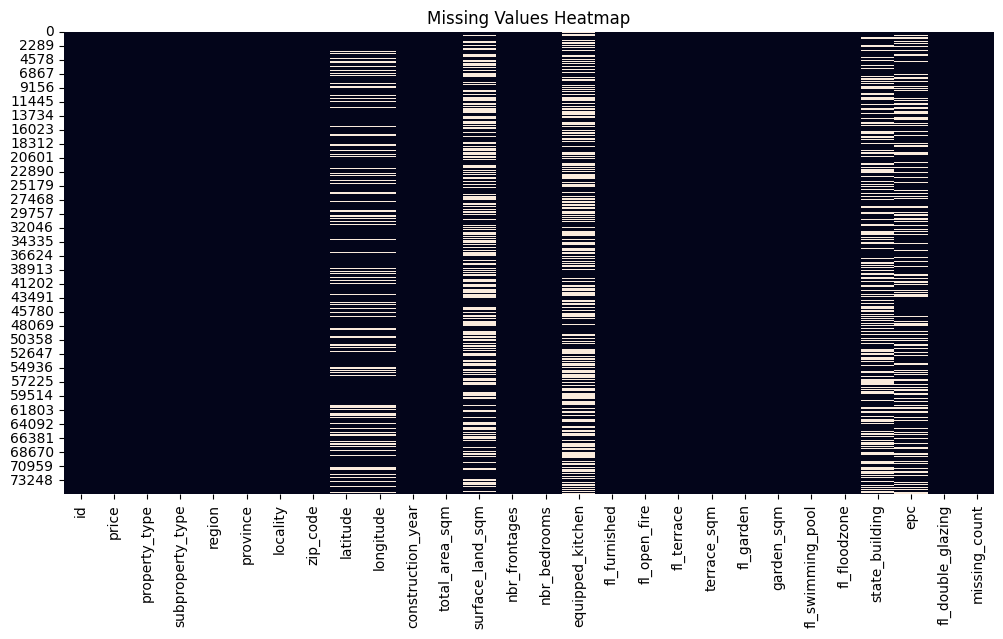


Rows with highest missing counts:


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,epc,fl_double_glazing,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,1,6,0,0,0,1,NaN,NaN,0,9
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,1,14,0,0,0,1,NaN,NaN,0,9
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,0,0,0,GOOD,NaN,0,7
39175,38929000,3195000,APARTMENT,APARTMENT,Flanders,Antwerp,Turnhout,2400,NaN,NaN,...,1,19,0,0,0,1,NaN,NaN,1,6
21123,58654000,3208440,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8000,NaN,NaN,...,1,0,1,0,0,0,NaN,NaN,0,6
29547,12185000,2810000,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,1,8,0,0,0,1,NaN,NaN,1,6
25876,35189000,2250000,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4000,NaN,NaN,...,1,11,0,0,0,1,NaN,NaN,0,6
68368,76903000,3926890,APARTMENT,APARTMENT,Flanders,Antwerp,Mechelen,2800,NaN,NaN,...,1,11,0,0,0,1,NaN,NaN,0,6
11102,19055000,2430000,APARTMENT,SERVICE_FLAT,Flanders,Antwerp,Turnhout,2300,NaN,NaN,...,1,10,0,0,0,0,NaN,NaN,0,6
11125,75312000,3200000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Marche-en-Famenne,6941,NaN,NaN,...,1,11,0,0,0,1,NaN,NaN,0,6


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data
file_path = '../Kristin/cleaned_properties_no_top3_allrows.csv'
df = pd.read_csv(file_path)

# --- 1. Basic info ---
print("=== DataFrame Info ===")
df.info()

print("\n=== Number of missing values per column ===")
missing_counts = df.isna().sum()
display(missing_counts.sort_values(ascending=False))

print("\n=== Percentage of missing values per column ===")
missing_percent = df.isna().mean() * 100
display(missing_percent.sort_values(ascending=False))

# --- 2. Visualize missing data using seaborn heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# --- 3. Identify rows with high missing values ---
df['missing_count'] = df.isna().sum(axis=1)
print("\nRows with highest missing counts:")
display(df.sort_values('missing_count', ascending=False).head(10))
